In [75]:
import torch
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [76]:
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0

In [79]:
for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
    cost = torch.mean(-y_train * torch.log(hypothesis)-(1-y_train) * torch.log(1-hypothesis))
    cost.backward()
    with torch.no_grad() as grd:
        W = W - lr * W.grad
        b = b - lr * b.grad
        if(epoch % 300 == 0):
            print( 'epoch: {}, cost: {:.6f}, W: {:.6f}' .format(epoch, cost.item(), W.squeeze()),  'b:',format(b))

epoch: 0, cost: 0.381491, W: -3.103761 b: tensor([[9.3975]])
epoch: 300, cost: 0.381491, W: -3.103761 b: tensor([[9.3975]])
epoch: 600, cost: 0.381491, W: -3.103761 b: tensor([[9.3975]])
epoch: 900, cost: 0.381491, W: -3.103761 b: tensor([[9.3975]])
epoch: 1200, cost: 0.381491, W: -3.103761 b: tensor([[9.3975]])
epoch: 1500, cost: 0.381491, W: -3.103761 b: tensor([[9.3975]])
epoch: 1800, cost: 0.381491, W: -3.103761 b: tensor([[9.3975]])
epoch: 2100, cost: 0.381491, W: -3.103761 b: tensor([[9.3975]])
epoch: 2400, cost: 0.381491, W: -3.103761 b: tensor([[9.3975]])
epoch: 2700, cost: 0.381491, W: -3.103761 b: tensor([[9.3975]])
epoch: 3000, cost: 0.381491, W: -3.103761 b: tensor([[9.3975]])


In [80]:
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


In [81]:
optimizer = torch.optim.SGD([W,b], lr=1.0)

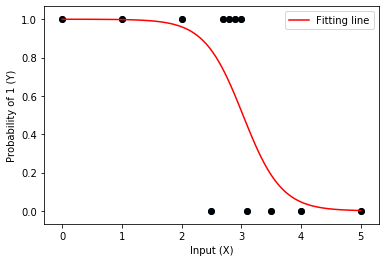

In [82]:
import matplotlib.pyplot as plt

W.requires_grad_(False)
b.requires_grad_(False)
plt.scatter(x_train, y_train)

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)

plt.plot(X,Y, c="#ff0000", label="Fitting line")
plt.legend()
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.scatter(x_train, y_train, c="black", label="Training data")

plt.show()